## Sentiment Analysis
Sentiment analysis is one of the most widely used applications of NLP. It consists of a language classification task where our goal is to classify positive, negative, and neutral sentiments. Given the following three statements we would aim to identify whether each is good, bad, or neutral:

*GBP rallies after stronger than ever economic performance.*

*GBP slips on fears of a divided economy.*

*GBP is one of several European currencies.*

When reading each of these examples, we percieve an overall feeling (the sentiment) behind each statement. The first sounds like great news, and so we see this as a positive statement. For the second statement, things seem more bleak, and so we perceive a more negative feeling. The final statement has neither positive nor negative connatations - it is simply a factual statement.

From this, we can say that statement (1) has a positive sentiment, (2) is negative, and (3) is neutral.

The typical flow of information through a sentiment classification model consists of **four** steps:

- Raw text data is tokenized (converted into numerical IDs that map that word to a vector representation of the same word)

- Token IDs are fed into the sentiment model

- A set of values are output, each value represents a class, and the value represents probability of that being the correct sentiment class, from zero (definitely not) to one (definitely yes).

- The argmax of this output array is taken to give us our winning sentiment classification.

We do not always have the three outputs classes [positive, negative, and neutal], often we will find models that predict just [positive, negative], or models that are more granular [very positive, somewhat positive, neutral, somewhat negative, very negative]. We can change the number of outputs classes (step 3) to fit to the correct number of classes.

## Sentiment with Flair

Flair offers models that we can use out-of-the-box. One of those is the English sentiment model, which we will learn how to use here.

First, we need to make sure Flair has been installed, we do this in our CLI with:

*pip install flair*

Flair uses PyTorch/TensorFlow in under the hood, so it's essential that you also have one of the two libraries (or both) installed. There are a few steps in applying sentiment analysis, these are:

1. Initializing the model.
2. Tokenizing input text.
3. Processing with the model.
4. (Optional) Formatting the outputs.


We then load the English sentiment model like so:

In [1]:
!pip install flair

     |████████████████████████████████| 322 kB 13.2 MB/s 
     |████████████████████████████████| 19.7 MB 1.3 MB/s 
     |████████████████████████████████| 788 kB 29.8 MB/s 
     |████████████████████████████████| 3.4 MB 60.3 MB/s 
     |████████████████████████████████| 1.2 MB 56.6 MB/s 
     |████████████████████████████████| 61 kB 380 kB/s 
     |████████████████████████████████| 64 kB 2.4 MB/s 
     |████████████████████████████████| 981 kB 83.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 48 kB 4.6 MB/s 
     |████████████████████████████████| 62 kB 825 kB/s 
     |████████████████████████████████| 895 kB 65.1 MB/s 
     |████████████████████████████████| 596 kB 60.7 MB/s 
     |████████████████████████████████| 3.3 MB 53.3 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=dacd967711ce4bd939c99a5ffaebb92179de59497ee44

In [2]:
import flair
model = flair.models.TextClassifier.load('en-sentiment')

2021-12-24 16:14:31,587 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpat3a0185


100%|██████████| 265512723/265512723 [00:06<00:00, 38952997.58B/s]

2021-12-24 16:14:38,494 copying /tmp/tmpat3a0185 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2021-12-24 16:14:39,074 removing temp file /tmp/tmpat3a0185
2021-12-24 16:14:39,107 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

The first time this load method is run for the 'en-sentiment' model the model will be downloaded. After this, the model is initialized. The en-sentiment model is a distilBERT model fitted with a classification head that outputs two classes - negative and positive.

Our next step is to tokenize input text. For this we use the Flair Sentence object, which we initialize by passing our text into it:

In [3]:
text = "I like you. I love you"  # we are expecting a confidently positive sentiment here

sentence = flair.data.Sentence(text)

sentence

Sentence: "I like you . I love you"   [− Tokens: 7]

Here we now have the Flair Sentence object, which contains our text, alongside a tokenized version of it (each word/punctuation character is an individual token):



In [4]:
sentence.to_tokenized_string()

'I like you . I love you'

In [5]:
# The next step is to process our tokenized inputs through out distilBERT classifier:

model.predict(sentence)

In [6]:
# The predict method doesn't output our prediction, instead the predictions are added to our sentence:

sentence

Sentence: "I like you . I love you"   [− Tokens: 7  − Sentence-Labels: {'label': [POSITIVE (0.9933)]}]

Here we can see that we are predicting a POSITIVE sentiment with a probability of 0.9933, which is very confident as expected. Let's repeat the process with something more negative.

In [7]:
text = "I hate it when I'm not learning"
sentence = flair.data.Sentence(text)
model.predict(sentence)
sentence

Sentence: "I hate it when I 'm not learning"   [− Tokens: 8  − Sentence-Labels: {'label': [NEGATIVE (0.9991)]}]

And we correctly predict a NEGATIVE sentiment. Finally, we will typically want to extract our predictions and format them into the format that we need for our own use-case (for example plotting sentiment over time). Let's take a look at how we do that.

The Sentence object provides us with a method called get_labels, we can use this to extract our sentiment prediction.

In [8]:
sentence.get_labels()

[NEGATIVE (0.9991)]

From this method we actually get a list, which contains our label object. To access each item in the list we need to dig a little deeper. We first access the label object by accessing the 0th index of our list. Flair Label objects contain two attributes, score and value - which contain our prediction.

In [9]:
sentence.get_labels()[0]

NEGATIVE (0.9991)

In [10]:
sentence.get_labels()[0].score

0.9991464614868164

In [11]:
sentence.get_labels()[0].value

'NEGATIVE'

## Sentiment with Transformers
The HuggingFace Transformers library is presently the most advanced and accessible library for building and using transformer models. As such, it will be what we primarily use throughout these notebooks.

To apply sentiment analysis using the transformers library, we first need to decide on a model to use - as we will be applying a pretrained model, rather than starting from scratch. The list of models available can be found at huggingface.co/models.

From the model page we select the Text Classification filter on the left of the page to filter for models that we can apply for text classification tasks immediately. We will be performing sentiment analysis on posts from /r/investing (in this section we will be using the example given in txt below), which are finance oriented, so we can use the finBERT model ProsusAI/finbert which has been trained on financial articles for financial sentiment classification.

FinBERT is ofcourse a BERT model, so when loading the model and tokenizer we will using BERT classes, and because we are performing sequence classification we will be using BertForSequenceClassification. Let's initialize our model and tokenizer:

In [12]:
from transformers import BertForSequenceClassification, BertTokenizer

# initialize the tokenizer for BERT models
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
# initialize the model for sequence classification
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

The first time that this is run when using the ProsusAI/finbert model, it will be downloaded from the HuggingFace model repositories. We will be following a very similar process to that which we worked through for our Flair sentiment classifier, with some added steps to convert model output activations to class predictions.

1. We tokenize our input text.

2. Tokenized inputs are fed into the model, which outputs final layer activations (note activations are not probabilities).

3. Convert those activations into probabilities using a softmax function (sigmoid for multiple classes).

4. Take the argmax of those probabilities.

5. (Optional) Extract the probability of the winning class.

For step one, we will use the encode_plus method:

In [15]:
len(txt.split())

111

In [13]:
# this is our example text
txt = ("Given the recent downturn in stocks especially in tech which is likely to persist as yields keep going up, "
       "I thought it would be prudent to share the risks of investing in ARK ETFs, written up very nicely by "
       "[The Bear Cave](https://thebearcave.substack.com/p/special-edition-will-ark-invest-blow). The risks comes "
       "primarily from ARK's illiquid and very large holdings in small cap companies. ARK is forced to sell its "
       "holdings whenever its liquid ETF gets hit with outflows as is especially the case in market downturns. "
       "This could force very painful liquidations at unfavorable prices and the ensuing crash goes into a "
       "positive feedback loop leading into a death spiral enticing even more outflows and predatory shorts.")

tokens = tokenizer.encode_plus(txt, max_length=512, truncation=True, padding='max_length',
                               add_special_tokens=True, return_tensors='pt')

tokens

{'input_ids': tensor([[  101,  2445,  1996,  3522,  2091, 22299,  1999, 15768,  2926,  1999,
          6627,  2029,  2003,  3497,  2000, 29486,  2004, 16189,  2562,  2183,
          2039,  1010,  1045,  2245,  2009,  2052,  2022, 10975, 12672,  3372,
          2000,  3745,  1996, 10831,  1997, 19920,  1999, 15745,  3802, 10343,
          1010,  2517,  2039,  2200, 19957,  2011,  1031,  1996,  4562,  5430,
          1033,  1006, 16770,  1024,  1013,  1013,  1996,  4783,  2906, 27454,
          1012,  4942,  9153,  3600,  1012,  4012,  1013,  1052,  1013,  2569,
          1011,  3179,  1011,  2097,  1011, 15745,  1011, 15697,  1011,  6271,
          1007,  1012,  1996, 10831,  3310,  3952,  2013, 15745,  1005,  1055,
          5665, 18515, 21272,  1998,  2200,  2312,  9583,  1999,  2235,  6178,
          3316,  1012, 15745,  2003,  3140,  2000,  5271,  2049,  9583,  7188,
          2049,  6381,  3802,  2546,  4152,  2718,  2007,  2041, 12314,  2015,
          2004,  2003,  2926,  1996,  

Here we have specified a few arguments that require some explanation.

- **max_length** - this tell the tokenizer the maximum number of tokens we want to see in each sample, for BERT we almost always use 512 as that is the length of sequences that BERT consumes.

- **truncation** - if our input string txt contains more tokens than allowed (specified in max_length parameter) then we cut all tokens past the max_length limit.

- **padding** - if our input string txt contains less tokens than specified by max_length then we pad the sequence with zeros (0 is the token ID for '[PAD]' - BERTs padding token).

- **add_special_tokens** - whether or not to add special tokens, when using BERT we always want this to be True unless we are adding them ourselves.

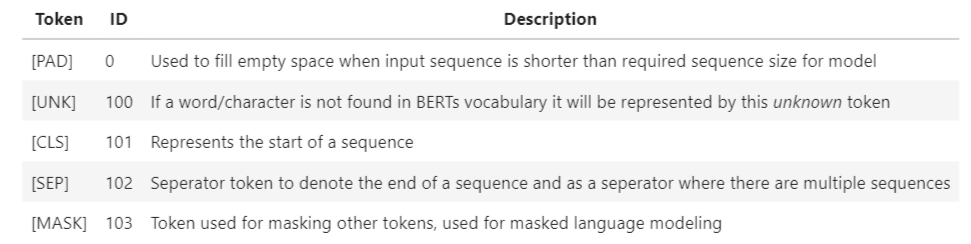

Note that our tokenized sequence begins with 101, the seperator token 102 can be found seperating the input sequence and padding tokens 0.

- **return_tensors** - here we specify either 'pt' to return PyTorch tensors, or 'tf' to return TensorFlow tensors.

The output produced includes three tensors in a dictionary format, 'input_ids', 'token_type_ids', and 'attention_mask'. We can ignore 'token_type_ids' as they are not used by BERT, the other two tensors are however.

- **'input_ids'** are the token ID representations of our input text. These will be passed into an embedding array where vector representations of each word will be found and passed into the following BERT layers.

- **'attention_mask'** tells the attention layers in BERT which words to calculate attention for. If you look at this tensors you will see that each 1 value maps to an input ID from the 'input_ids' tensor, whereas each 0 value maps to a padding token from the 'attention_mask' tensor. In the attention layer (activations mapping to padding tokens are multiplied by 0, and so are cancelled out).

Now that we have our tokenized input, we can pass it onto our model for inference. We pass in our tokens as \*kwargs (key word arguments), which we can use thanks to our tokens being in a dictionary format. When a dictionary is passed as a \*kwargs argument, the keys will be taken literally as variable names and the respective values become the variable values. So these two approaches would do the same thing:

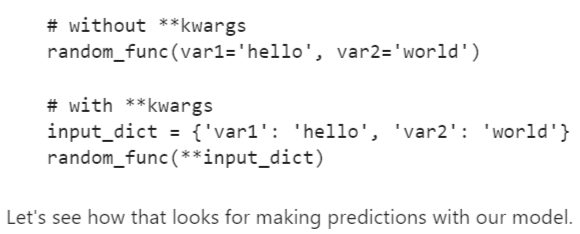

In [16]:
output = model(**tokens)

output

SequenceClassifierOutput([('logits',
                           tensor([[-1.8200,  2.4484,  0.0216]], grad_fn=<AddmmBackward0>))])

You will notice here that the output logits tensor cannot be a set of probabilities because probability values must be within the range 0-1. These are infact the final output activations from BERT, to convert these into probabilities we must apply a softmax function. We will be using the PyTorch implementation of softmax for this, which we import from torch.nn.functional.

In [17]:
import torch.nn.functional as F 
# apply softmax to the logits output tensor of our model (in index 0) across dimension -1
probs = F.softmax(output[0], dim=-1)

probs

tensor([[0.0127, 0.9072, 0.0801]], grad_fn=<SoftmaxBackward0>)

(We use dim=-1 as -1 signifies our tensors final dimension, so if we had a 3D tensor with dims [0, 1, 2] writing dim=-1 is the equivalent to writing dim=2. In this case if we wrote dim=-2 this would be the equivalent to writing dim=1. For a 2D tensor with dims [0, 1], dim=-1 is the equivalent of dim=1.)

Now we have a tensor containing three classes, all with outputs within the probability range of 0-1, these are our probabilities! We can see that class index 1 has the highest probability with a value of 0.9072. We can use PyTorch's argmax function to extract this, we can use argmax after importing torch.

In [18]:
import torch 

pred = torch.argmax(probs)

pred

tensor(1)

Argmax outputs our winning class as 1 as expected. To convert this value from a PyTorch tensor to a Python integer we can use the item method.



In [19]:
pred.item()

1